11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/6
422/422 - 92s - 218ms/step - accuracy: 0.9572 - loss: 0.1432 - val_accuracy: 0.5642 - val_loss: 1.0071
Epoch 2/6
422/422 - 144s - 340ms/step - accuracy: 0.9856 - loss: 0.0487 - val_accuracy: 0.9848 - val_loss: 0.0482
Epoch 3/6
422/422 - 141s - 334ms/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.9853 - val_loss: 0.0508
Epoch 4/6
422/422 - 88s - 208ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9897 - val_loss: 0.0329
Epoch 5/6
422/422 - 138s - 326ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accuracy: 0.9888 - val_loss: 0.0358
Epoch 6/6
422/422 - 146s - 346ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9882 - val_loss: 0.0398

Test accuracy: 99.09%  |  Test loss: 0.0335


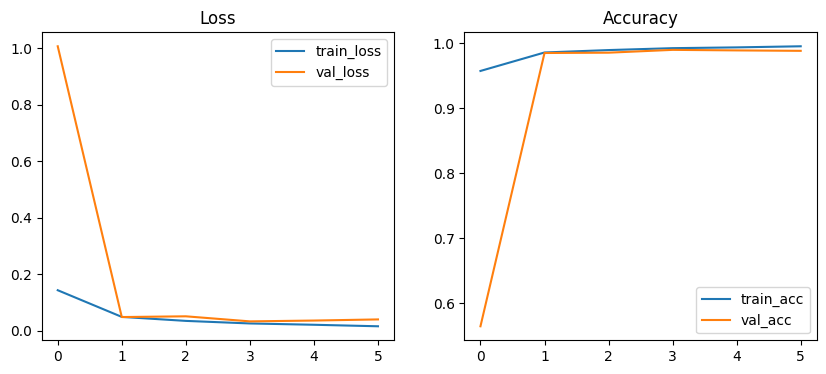

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


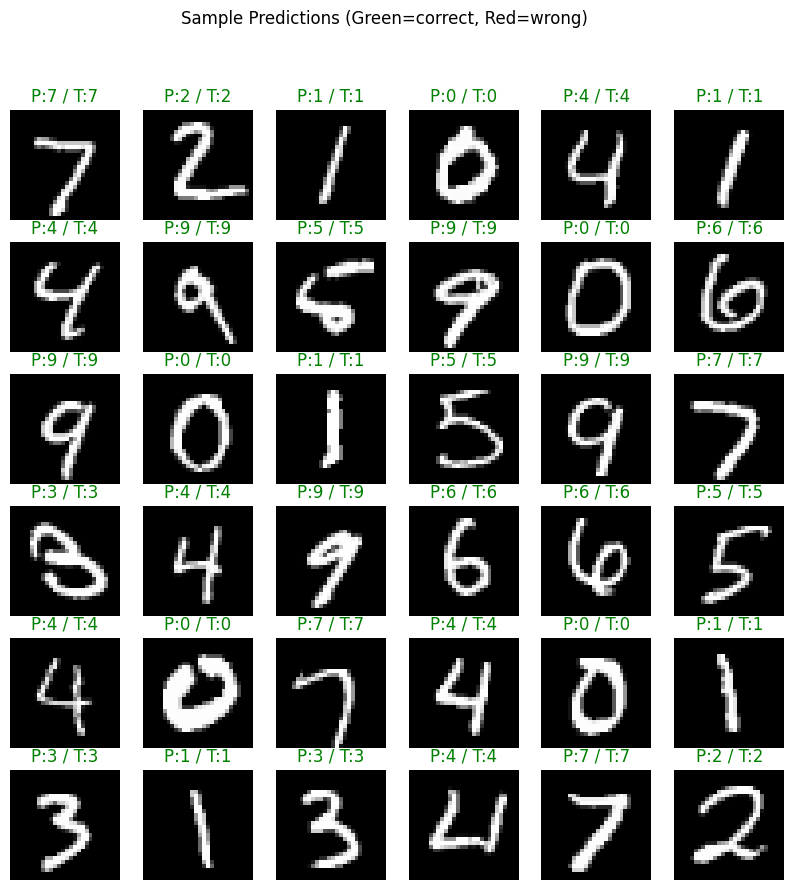

Model saved to: /content/mnist_cnn.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Example prediction: 7 true: 7


In [ ]:


import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Fix random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# 1) Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 2) Preprocess: Normalize to [0,1], add channel dimension
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # shape (N,28,28,1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode labels
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# 3) Model: Simple but effective CNN
def build_model(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()
model.summary()

# 4) Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5) Train
epochs = 6  # increase to 10-15 for higher accuracy
batch_size = 128

history = model.fit(x_train, y_train_cat,
                    validation_split=0.1,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2)

# 6) Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc*100:.2f}%  |  Test loss: {test_loss:.4f}")

# 7) Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')

plt.show()

# 8) Show some predictions
preds = model.predict(x_test[:36])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    color = 'green' if pred_labels[i] == y_test[i] else 'red'
    plt.title(f"P:{pred_labels[i]} / T:{y_test[i]}", color=color)
plt.suptitle("Sample Predictions (Green=correct, Red=wrong)")
plt.show()

# 9) Save model
save_path = 'mnist_cnn.h5'
model.save(save_path)
print(f"Model saved to: {os.path.abspath(save_path)}")

# 10) Utility: predict function for custom images (28x28 grayscale array expected)
def predict_image(img_array):
    arr = img_array.copy().astype('float32')
    if arr.max() > 1.0:
        arr = arr / 255.0
    if arr.ndim == 2:
        arr = np.expand_dims(arr, -1)
    arr = np.expand_dims(arr, 0)  # batch dim
    preds = model.predict(arr)
    return np.argmax(preds, axis=1)[0], preds[0]

# Example: predict first test image
pred0, probs0 = predict_image((x_test[0]*255).squeeze())
print("Example prediction:", pred0, "true:", int(y_test[0]))

